# Import lib

In [1]:
import os
# from split_image import split_image
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import random
import uuid
import glob
import uuid
import datetime

# Change from pdf to jpg

In [7]:
pip install pypdfium2

  Using cached pypdfium2-4.9.0-py3-none-manylinux_2_26_x86_64.whl (2.9 MB)

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pypdfium2 as pdfium


directory = "/home/pan_pawel/Documents/GitHub/AECVision/images/test pypdfium/"
folder = os.walk(directory)

for froot, dirs, files in folder:
    for file in files:
        file_path = os.path.join(froot, file)
        pdf = pdfium.PdfDocument(file_path)
        n_pages = len(pdf)
        
        for page_number in range(n_pages):
            page = pdf[page_number]
            # page.set_rotation(90) # if rotation neded
            pil_image = page.render(scale=random.uniform(4.7, 5.8)).to_pil()
            pil_image.save(f"{froot}{file}{page_number+1}.jpg")

PdfiumError: Failed to load document (PDFium: Data format error).

# Cut images to 1280x1280 format

In [6]:
def to_2560_format(h, w):
    # for random crop because buildings are similar on sheets by flor level
    random_number = random.randrange(100,600) 
    return ((w-1)*2560+random_number,(h-1)*2560+random_number, w*2560+random_number, h*2560+random_number)


Image.MAX_IMAGE_PIXELS = 1000000000 

# directory = "images/test"
directory = "images/test pypdfium/test/"
folder = os.walk(directory)

for froot, dirs, files in folder:
    for file in files:
        if file.endswith(".jpg"):
            file_path = os.path.join(froot, file)
            out_path = os.path.join(froot, "splited")
            img = Image.open(file_path)
            w, h = img.size
            print(h)
            print(w)
            w_crop_iteration = int(w/2560)
            h_crop_iteration = int(h/2560)
            for h_multiplication, h_iteration in enumerate(range(h_crop_iteration), 1):
                for w_multiplication, w_iteration in enumerate(range(w_crop_iteration), 1):
                    print("h mult {} w mult {}".format(h_multiplication, w_multiplication))
                    crop_area = to_2560_format(h_multiplication, w_multiplication)
                    print(crop_area)
                    img_crop = img.crop(crop_area)
                    # Resize
                    img_crop.thumbnail((1280, 1280))
                    crop_save = os.path.join(out_path, "{}_{}_{}.jpg".format(file[:-5:], h_multiplication, w_multiplication))
                    img_crop.save(crop_save)

6698
14667
h mult 1 w mult 1
(398, 398, 2958, 2958)
h mult 1 w mult 2
(3050, 490, 5610, 3050)
h mult 1 w mult 3
(5616, 496, 8176, 3056)
h mult 1 w mult 4
(8276, 596, 10836, 3156)
h mult 1 w mult 5
(10503, 263, 13063, 2823)
h mult 2 w mult 1
(319, 2879, 2879, 5439)
h mult 2 w mult 2
(3156, 3156, 5716, 5716)
h mult 2 w mult 3
(5697, 3137, 8257, 5697)
h mult 2 w mult 4
(7995, 2875, 10555, 5435)
h mult 2 w mult 5
(10393, 2713, 12953, 5273)
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280
1280


Add prefix to all splitted images

In [6]:
# Python program to rename all file
# names in your directory
import os
import uuid
import datetime
import fnmatch


os.chdir('/home/pan_pawel/Documents/GitHub/AECVision/images/test/splited/old/')
print(os.getcwd())

for count, f in enumerate(fnmatch.filter(os.listdir(), "*.jpg")):
	image_name = '{}{:-%Y%m%d%H%M%S}'.format(str(uuid.uuid4().hex), datetime.date.today())
	f_name, f_ext = os.path.splitext(f)
	f_name = image_name + str(count) + "-preannotation_1"
	new_name = f'{f_name}{f_ext}'
	os.rename(f, new_name)


/home/pan_pawel/Documents/GitHub/AECVision/images/test/splited/old


Rename images and txt annotation from folders

In [51]:
PATH = "/home/pan_pawel/Documents/GitHub/AECVision/small_dataset_rar/project-4-at-2023-05-18-19-31-7c22f4aa/"


for root, dir, files in os.walk(os.path.join(PATH, "images/")):
    for file in files:
        print(file)
        new_name = str(uuid.uuid4().hex)+ str(datetime.date.today())
        image_path = os.path.join(PATH, "images", file)
        image_rename = os.path.join(PATH, "images", new_name)
        annotation_path = os.path.join(PATH, "labels", "{}.txt".format(file[:-4:]))
        annotation_rename = os.path.join(PATH, "labels", new_name)
        os.rename(image_path, image_rename)
        os.rename(annotation_path, annotation_rename)

0e67e1b438904898895a1772e4d74329-20230501000000590-preannotation_1.jpg
7bb3adad-240-IP-00-02-DR-A-02003-czyste.pdf-_2_7.jpg
068c0c90-240-IP-B4-06-DR-A-02008-01.pdf-_3_3.jpg
66dbf188-240-IP-AA-00-DR-A-70049-czyste.pdf-_1_2.jpg
6a3098ed8595413f90cf8372a5818433-2023050300000079-preannotation_1.jpg
6ecb6ade-240-IP-AA-00-DR-A-70048.pdf-_1_2.jpg
610ccb45-240-IP-00-01-DR-A-02002-czyste.pdf-_2_5.jpg
b4854f6595d64fa7aaa00eefd55c1ac7-2023050300000048-preannotation_1.jpg
4aac72c316684aceba9cd64fdc555cc3-20230501000000468-preannotation_1.jpg
6dfbec44-240-IP-00-01-DR-A-02002-czyste.pdf-_1_10.jpg
ad943dd1-sss_1_1.jpg
e528ae46-240-IP-00-00-DR-A-02001.pdf-_1_11.jpg
3cfe0bfb1e6445c5b339034aa18c1c3a-20230501000000804-preannotation_1.jpg
302bd47579d642eea3a72abc0130a1da-20230503000000102-preannotation_1.jpg
98f4ab7a-ee_2_1.jpg
48268ce3e3224691ad62cde2ba4c1aea-2023050300000078-preannotation_1.jpg
5b08b14c1aee45639d6486c92845c5e5-20230501000000109-preannotation_1.jpg
bc7e8de1ff354c19a774819a0e668c22-202305

# Split images

In [52]:
import glob
import random
import os
import shutil

# Get all paths to your images files and text files
PATH = '/home/pan_pawel/Documents/GitHub/AECVision/small_dataset_rar/project-4-at-2023-05-18-19-31-7c22f4aa/'
img_paths = glob.glob(PATH+'/images/*')
txt_paths = glob.glob(PATH+'/labels/*')

# Split to train and val/test 
# Calculate number of files for training, validation
data_size = len(img_paths)
r = 0.8
train_size = int(data_size * 0.8)

# Shuffle two list
img_txt = list(zip(img_paths, txt_paths))
random.seed(43)
random.shuffle(img_txt)
img_paths, txt_paths = zip(*img_txt)

# Now split them
train_img_paths = img_paths[:train_size]
train_txt_paths = txt_paths[:train_size]

valid_test_img_paths = img_paths[train_size:]
valid_test_txt_paths = txt_paths[train_size:]

#Split to val and test folders
# Calculate number of files for training, validation
data_size = len(valid_test_img_paths)
r = 0.5
test_size = int(data_size * 0.5)

# Shuffle two list
img_txt = list(zip(valid_test_img_paths, valid_test_txt_paths))
random.seed(43)
random.shuffle(img_txt)
valid_test_img_paths, valid_test_txt_paths = zip(*img_txt)

# Now split them
test_img_paths = valid_test_img_paths[:test_size]
test_txt_paths = valid_test_txt_paths[:test_size]

valid_img_paths = valid_test_img_paths[test_size:]
valid_txt_paths = valid_test_txt_paths[test_size:]

# Move them to train, valid folders
PATH = "/home/pan_pawel/Documents/GitHub/AECVision/small_dataset"
train_images_folder = PATH+'/images/training/'
train_label_folder = PATH+'/labels/training/'
valid_images_folder = PATH+'/images/validation/'
valid_label_folder = PATH+'/labels/validation/'
test_images_folder = PATH+'/images/test/'
test_label_folder = PATH+'/labels/test/'

try:
    os.makedirs(train_images_folder)
    os.makedirs(train_label_folder)
    os.makedirs(valid_images_folder)
    os.makedirs(valid_label_folder)
    os.makedirs(test_images_folder)
    os.makedirs(test_label_folder)
except:
    pass

# def copy(paths, folder):
#     for p in paths:
#         shutil.copy(p, folder)

def copy(paths, folder):
    for p in paths:
        os.rename(p, (folder+"{}.jpg".format(os.path.basename(p))))

copy(train_img_paths, train_images_folder)
copy(valid_img_paths, valid_images_folder)
copy(test_img_paths, test_images_folder)


# Labels 

In [53]:

img_test_paths = [os.path.splitext(filename)[0] for filename in glob.glob(PATH+'/images/test/*')]
img_training_paths = [os.path.splitext(filename)[0] for filename in glob.glob(PATH+'/images/training/*')]
img_validation_paths = [os.path.splitext(filename)[0] for filename in glob.glob(PATH+'/images/validation/*')]

def basename(i):
    return os.path.basename(i)

img_test_paths = list(map(basename, img_test_paths))
img_training_paths = list(map(basename, img_training_paths))
img_validation_paths = list(map(basename, img_validation_paths))

for n in img_test_paths:
    print(n)

for file in txt_paths:
    file_name = os.path.basename(file)
    print(file_name)
    
    if file_name in img_training_paths:
        os.rename(file, (train_label_folder+"{}.txt".format(file_name)))
    elif file_name in img_validation_paths:
        os.rename(file, (valid_label_folder+"{}.txt".format(file_name)))
    elif file_name in img_test_paths:
        os.rename(file, (test_label_folder+"{}.txt".format(file_name)))
    else:
        pass

db995f5af8fd41178a25b37a34f73b1e2023-05-19
ddedb592fbf948f982a91647f24761e52023-05-19
135d7095487a41f6a25b09540f9921872023-05-19
72219efae202472e86a7222013eb15502023-05-19
cf2d1b4529a04865a9a1ef6a0d4de3972023-05-19
6413d04b823747d1b48c85fcd4ef40962023-05-19
c0d6847d9f894d30a655ea5a0f12b2002023-05-19
13b7a36be70d4fa18f17a2c4a149b4fd2023-05-19
232973fc4fc2451bb3957cf71f4beffa2023-05-19
6e5499621f6747ee94b3c5847278e5fb2023-05-19
cb8cad4fd8ca4a27a3b875d66f41ca702023-05-19
1af8268763b94dd3be1cf6d36c88d8f02023-05-19
345fad3c39af4843bd7d2b326eb8d12a2023-05-19
e7dc1db71cf14efa84bdac53b767747f2023-05-19
cc95a70e04d442c99a488ba34da70ad32023-05-19
b44640c2ab3f4ea9a12c56159d42a7942023-05-19
071548decebf443fa117a59aea2d19ba2023-05-19
3a9d3ba764394781b3f21ad0c81c160b2023-05-19
6e37e05345794521b87654d38d1f36ac2023-05-19
856b356b66144f07b3061a61f6c4340c2023-05-19
b675ef3800144e69bd40f603623eea182023-05-19
3cb83ca5387d4be68b56a9077b2061dc2023-05-19
92e9b161fdd44a60a5c2ba79e1b4c7c52023-05-19
6edf807a459

# Augmentation

In [12]:
import albumentations as A
import cv2


In [223]:
class_names = ["bath",
"dishwasher / washing machine",
"door",
"furniture",
"refrigerator",
"sink",
"stairs",
"stove",
"table",
"wall",
"wc",
"window"]

transform = A.Compose([
    A.RandomResizedCrop(width=1280, height=1280, scale=(0.2,2)),
    A.HorizontalFlip(p=0.5)
], bbox_params=A.BboxParams(format='yolo'))

In [217]:
def import_txt_annotations(txt_file_path=""):
    bboxes_lists =[]
    class_labels = []
    bbox_class_list =[]
    with open(txt_file_path) as f:
        for line in f:
            stripped_line = line.strip()
            line_list = stripped_line.split()
            bbox_class= [float(i) for i in line_list[1:5]]
            
            bbox_class = bbox_class + [int(line_list[0])]
            class_labels.append(int(line_list[0]))
            bboxes_lists.append(float(i) for i in line_list[1:5])
            bbox_class_list.append(bbox_class)
            print(bboxes_lists)
            print(class_labels)
            print(bbox_class_list)
    return bboxes_lists, class_labels, bbox_class_list


def save_augmented_image_txt(image_path="", txt_path="", transformed_image=[], transformed_bboxes=[]):
    uuid_number = str(uuid.uuid4().hex)+ str(datetime.date.today())
    cv2.imwrite("{}/{}.jpg".format(image_path, uuid_number), transformed_image)

    with open("{}/{}.txt".format(txt_path, uuid_number), "w") as f:

        for line in transformed_bboxes:
            print(line[4])
            f.write(str(line[4]))
            for coordinates in line[0:4]:
                print(coordinates)
                f.write(" "+str(coordinates))
            f.write("\n")

In [235]:
current_path = os.path.abspath(os.getcwd())
augmented_image_path = os.path.join(current_path, "small_dataset_augmented/images/test/")
augmented_txt_path = os.path.join(current_path, "small_dataset_augmented/labels/test/")

for root, dir, files in os.walk(os.path.join(current_path, "small_dataset/images/test")):
    for file in files:
        image = cv2.imread(os.path.join(root,file))
        txt_path = os.path.join(current_path, "small_dataset/labels/test/{}.txt".format(file[:-4:]))
        print(txt_path+" pathhhhh")
        try:
            bboxes_lists, class_labels, bbox_class_list = import_txt_annotations(txt_path)
            # print(txt_path)
        
            transformed = transform(image=image, bboxes=bbox_class_list)
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            save_augmented_image_txt(augmented_image_path, augmented_txt_path, transformed_image, transformed_bboxes)
        except Exception as e:
            print("error with file: {}".format(file))


/home/pan_pawel/Documents/GitHub/AECVision/small_dataset/labels/test/db995f5af8fd41178a25b37a34f73b1e2023-05-19.txt pathhhhh
[<generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47aea50>]
[9]
[[0.8504011119658006, 0.7729447376073786, 0.0116977760683992, 0.13831773333244043, 9]]
[<generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47aea50>, <generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47ae5f0>]
[9, 9]
[[0.8504011119658006, 0.7729447376073786, 0.0116977760683992, 0.13831773333244043, 9], [0.8433590000000002, 0.8379223358974017, 0.022656300000000008, 0.013218328205197812, 9]]
[<generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47aea50>, <generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47ae5f0>, <generator object import_txt_annotations.<locals>.<genexpr> at 0x7f21d47ae6d0>]
[9, 9, 9]
[[0.8504011119658006, 0.7729447376073786, 0.0116977760683992, 0.13831773333244043, 9], [0.8433590000000002, 

In [19]:
transformed = transform(image=image, bboxes=bbox_class_list)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
# transformed_class_labels = transformed['class_labels']

# Plot train images

In [24]:
class_names = ["bath",
"dishwasher / washing machine",
"door",
"furniture",
"refrigerator",
"sink",
"stairs",
"stove",
"table",
"wall",
"wc",
"window"]
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [25]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [26]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=1
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name, 
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-12),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [27]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(25, 20))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                # label = label_line[0]
                # bbox_string = label_line[2:]
                # print(bbox_string)
                num, x_c, y_c, w, h = label_line.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                # print(bboxes)
                labels.append(num)
        result_image = plot_box(image, bboxes, labels)
        # print(result_image)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

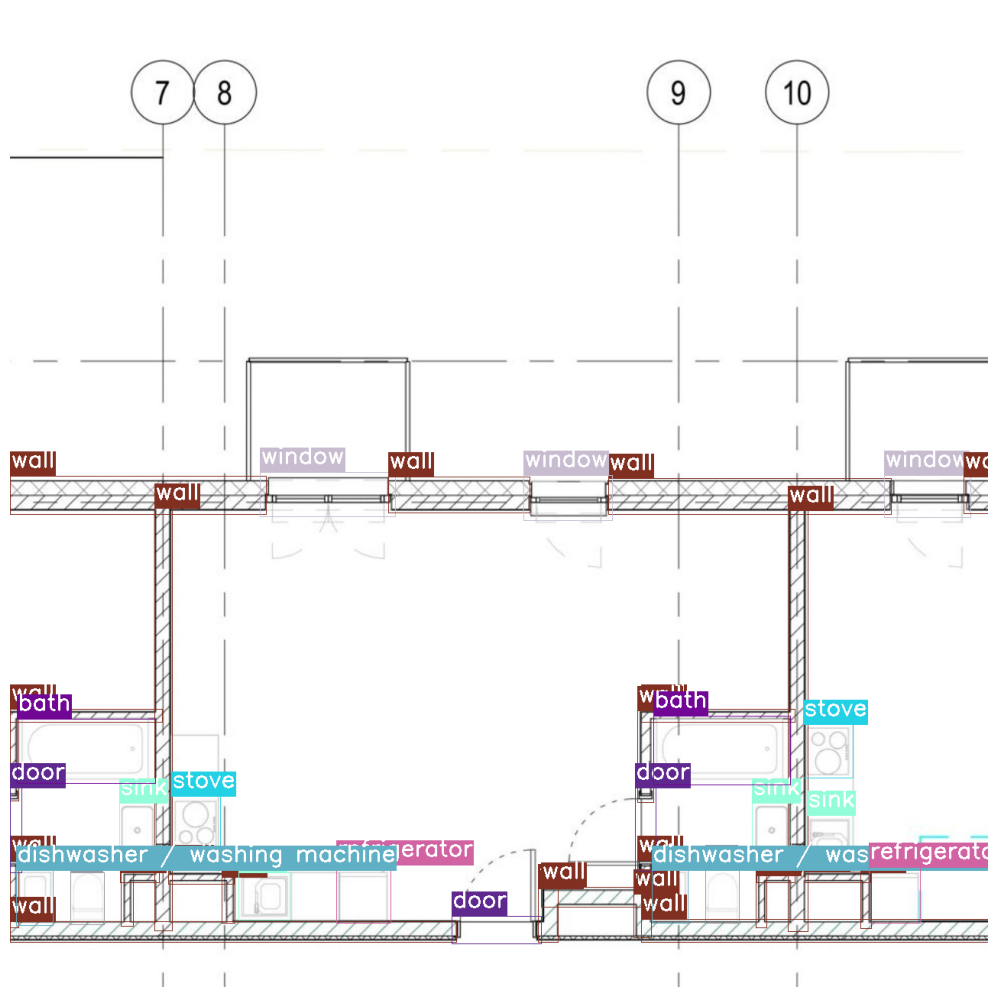

In [347]:
# Visualize a few training images.
PATH = "/home/pan_pawel/Documents/GitHub/AECVision/small_dataset_augmented"
plot(
    image_paths=PATH + '/images/training/*', 
    label_paths=PATH + '/labels/training/*',
    num_samples=1,
)

# Tensorboard

In [ ]:
tensorboard --logdir=data/ --host localhost --port 8888

# Model train

In [5]:
!python ./yolov5/train.py --img 1280 --batch-size 6 --epochs 10 --data ./small_dataset/dataset.yaml --cfg ./yolov5/models/yolov5s.yaml --weights '' --cache

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]
train.py: error: unrecognize